# OUPT

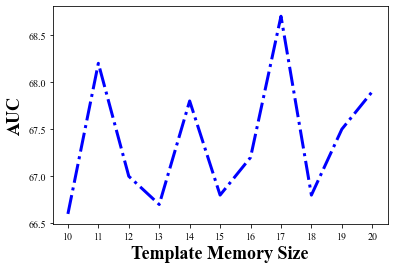

In [16]:
import numpy as np
import matplotlib.pyplot as plt

output_path = './results/oupt/'

x_range = np.arange(10,21)
# y_precision= [86.4, 89.0, 87.1, 87.1, 88.6, 86.9, 87.3, 89.9, 87.4, 88.3,88.3]
y_success = [66.6, 68.2, 67.0, 66.7, 67.8, 66.8, 67.2, 68.7, 66.8, 67.5, 67.9]

# plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Template Memory Size',font1)
#设置x轴标签及其字号
plt.ylabel('AUC',font1) #Precision AUC
plt.xticks(x_range,rotation = 0)
# 保存图片到本地

plt.savefig(output_path + 'memory_success.png',dpi=300,bbox_inches='tight')
plt.show()


# VSLT

True

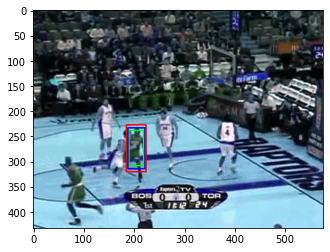

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

output_path = './results/vslt/'
data_path = 'D:/Tracking/Datasets/'
fname = data_path + 'OTB100/Basketball/img/0010.jpg'
img = cv2.imread(fname)
rect_disp_colors = {1: (0, 255, 0), 2: (0, 0, 255), 3: (255, 0, 0),
                    4: (255, 255, 255), 5: (0, 0, 0), 6: (0, 255, 128),
                    7: (123, 123, 123), 8: (255, 128, 0), 9: (128, 0, 255)}

gt_state = [187,233,34,81] # 1: [198,214,34,81] 10:[187,233,34,81]
pos = [gt_state[0] + (gt_state[2] - 1)/2, gt_state[1] + (gt_state[3] - 1)/2]
target_sz = [gt_state[2], gt_state[3]]
scale_factors = 1.15**np.arange(-1, 2)

# multi_scales = []
# for s1 in scale_factors:
#     for s2 in scale_factors:
#         multi_scales.append([s1, s2])
# ms = np.array(multi_scales) 
# sample_scales = ms * target_sz

sample_scales = [s * np.array(target_sz) for s in scale_factors]

for i, s in enumerate(sample_scales,start=1):
    tl = tuple(map(int,[pos[0] - (s[0]-1)/2 + 1, pos[1] - s[1]/2 + 1]))
    br = tuple(map(int,[tl[0]+s[0], tl[1]+s[1]]))
    col = rect_disp_colors[i]
    cv2.rectangle(img, tl, br, col, 2)

plt.imshow(img)
# cv2.imwrite(output_path + '0010_new_fast.jpg', img)

True

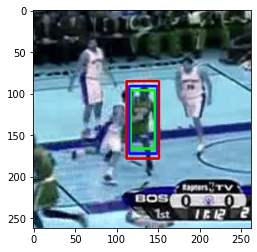

In [9]:
# crop_size = [5*s for s in target_sz]
crop_size = int(np.sqrt(5**2*target_sz[0]*target_sz[1]))
im1 = cv2.imread(output_path + '0010_new_fast.jpg')
# im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

# print(im1.shape)
tl = tuple(map(int,[pos[0] - (crop_size - 1)/2, pos[1] - (crop_size - 1)/2]))
br = tuple(map(int,[tl[0]+crop_size, tl[1]+crop_size]))
im_crop = im1[tl[1]:br[1],tl[0]:br[0]]
# print(np.array(im_crop).shape)
plt.imshow(im_crop)
cv2.imwrite(output_path + 'test.jpg', im_crop)

True

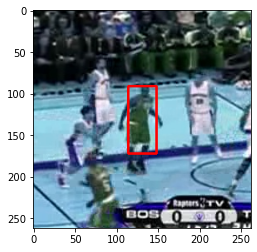

In [11]:
import cv2
import matplotlib.pyplot as plt
_tracker_disp_colors = {1: (0, 255, 0), 2:(255, 0, 0), 3:(0, 0, 255),
                        4: (255, 255, 255), 5: (0, 0, 0), 6: (255, 128, 0)
                        }
fname = data_path + 'OTB100/Basketball/img/0001.jpg' # reference image
img2 = cv2.imread(fname)
gt_state = [198,214,34,81] 
cv2.rectangle(img2, (gt_state[0],gt_state[1]), (gt_state[0] + gt_state[2],gt_state[1] + gt_state[3]), _tracker_disp_colors[2], 2)
# plt.imshow(img2)

pos = [gt_state[0] + (gt_state[2] - 1)/2, gt_state[1] + (gt_state[3] - 1)/2]
# print(im1.shape)
tl = tuple(map(int,[pos[0] - (crop_size - 1)/2, pos[1] - (crop_size - 1)/2]))
br = tuple(map(int,[tl[0]+crop_size, tl[1]+crop_size]))
im_crop = img2[tl[1]:br[1],tl[0]:br[0]]

plt.imshow(im_crop)
cv2.imwrite(output_path + 'reference.jpg', im_crop)

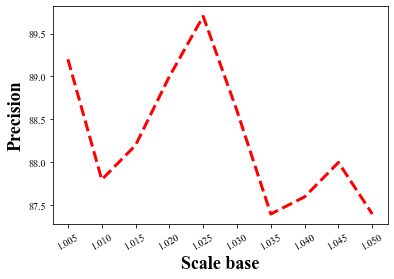

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# x_range = [i for i in np.arange(1.005,1.05,0.005)]
x_range = [1.005,1.010,1.015,1.020,1.025,1.030,1.035,1.040,1.045,1.050]
y_precision = [89.2,87.8,88.2,89.0,89.7,88.6,87.4,87.6,88.0,87.4]
# y_success = [60.5,60.5,59.8,60.6,60.2,60.3,58.9,58.4,59.2,58.0]
plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
# plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Scale base',font1)
#设置x轴标签及其字号
plt.ylabel('Precision',font1) #Precision Success
plt.xticks(np.arange(1.005,1.05,0.005),rotation = 30)
# 保存图片到本地

plt.savefig(output_path + 'scale_precision.png',dpi=300,bbox_inches='tight')
plt.show()


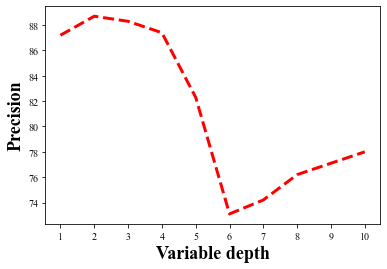

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x_range = [i+1 for i in range(10)]
y_precision = [87.2,88.7,88.3,87.4,82.3,73.1,74.2,76.2,77.1,78.0]
# y_success = [63.0,63.7,62.0,60.4,55.2,48.2,49.7,49.7,50.8,52.0]
plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
# plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Variable depth',font1)
#设置x轴标签及其字号
plt.ylabel('Precision',font1) #Precision
plt.xticks(np.arange(1,11))
# 保存图片到本地

plt.savefig('variable_precision.png',dpi=300,bbox_inches='tight')
plt.show()
